<h1> 3-4 Classfying_Movie_review: Two-Class classification             

 =>Positive or Nagative


In [48]:
import keras
keras.__version__

'2.2.4'

In [6]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

<h1>IMDB DataSet
<h3>1) IMDB 데이터셋
 IMDB(Internet Movie DataBase)는 5만개의 샘플을 가지고 있고, train_data로 사용되는 2만5천개의 데이터와 test_data로 사용되는 2만 5천개의 데이터를 가지고 있다. 
 <h3>2) 각각의 데이터는 Positive review와 negative review를 50%씩 가지고있고, train_labels와 test_labels에 각각 0과 1이라는 데이터를 가지고 있다. 
 <h3> 3)num_words = 10000의 의미는 자주 등장하는 단어를 1만개로 제한한 것이다.

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

IMDB_DATA
  
  ==> IMDB의 데이터셋도 케라스에 포함되어 있고, 리뷰 데이터 들은 텍스트 데이터를 다룰 때 기본적으로 수행 되는 전처리로 인해,
    각 단어가 숫자 시퀀스로 변환되어 있기 때문에 위와 같은 값이 출력된다.


In [8]:
train_labels[0]

1

각각의 라벨에는 1 또는 0의 값이 저장되어 있고, 이는 Positive or Nagative를 의미한다.

In [11]:
max([max(sequence) for sequence in train_data])

9999

num_words = 10000 으로 제한 했기 때문에, 단어 인덱스는 9999를 넘지 않습니다.

In [14]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


In [15]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [51]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #1
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1. #2
    return results


x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')

y_test = np.asarray(test_labels).astype('float32')

<h2> 정수 시퀀스를 이진 행렬로 인코딩 하기
    <h3>One-hot Encoding 을 통하여 0과 1의 벡터로 변환합니다
    <h3>One-hot Encoding : 단어의 집합의 크기를 벡터의 차원이라고 정의. 각 단어에 고유한 인덱스 번호를 부여한 뒤, 그 중에 표현하고 싶은 단     어는 1로 표현하고, 그 외의 단어들은 0을 부여하는 방식이다.
    <h3> 위 코드를 보면,1)행렬의 모든 원소를 0으로 만든 뒤 , 2) 특정 위치의 값을 1로 바꾸는 기능을 가지도록 코딩을 하였다.
    <h4>==> One-hot Encoding 방식
    <h3> 그 뒤, train 데이터와 test 데이터를 벡터화 시키기 위해 One-hot Encoding 방식을 사용하여 데이터를 변환해주었다.
    
   
    

In [50]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

샘플의 값이 0 또는 1의 벡터로 변환된 모습을 볼 수 있다.

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


<h2> 신경망 모델 만들기
    
<h3>Input -> Dense(units = 16) -> Dense(units = 16) -> Dense(units = 1) -> Outputs
<h3>Input : Vectorized Text  Output : probabability(sigmoid)
 
 <h3>마지막 출력층에서는, 부정 혹은 긍정의 결과가 나와야 하기 때문에, sigmoid를 사용한다.



In [23]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy', 
             metrics=['accuracy'])

<h2>옵티마이저 설정하기
 <h4>optimizer : rmsprop <h4>loss : binary_crossentropy
 <h4>신경망의 출력이 sigmoid를 통한 확률이기 때문에, binary_crossentropy가 적절하다.
 <h4>optimizer : Neural Network를 구성하는 알고리즘을 최적화 시켜주는 도구
 <h4>loss function : 예측값과 실제값간의 차이를 표현한 일종의 수식
 <h4> metrics : 실제 화면상으로 출력되는 output을 표현한다.


In [26]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [27]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_yal = y_train[:10000]
partial_y_train = y_train[10000:]

<h2>훈련검증
   <h3> 검증 세트 준비하기
      <h3> 처음본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10000개의 샘플을 떼어 검증 세트를 만들어야한다.

In [31]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs =20,
                   batch_size=512,
                   validation_data=(x_val, y_yal))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 578us/step - loss: 0.5078 - acc: 0.7829 - val_loss: 0.3791 - val_acc: 0.8693
Epoch 2/20
15000/15000 [==============================] - 4s 245us/step - loss: 0.3002 - acc: 0.9045 - val_loss: 0.3000 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 3s 229us/step - loss: 0.2178 - acc: 0.9285 - val_loss: 0.3088 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.1750 - acc: 0.9434 - val_loss: 0.2842 - val_acc: 0.8843
Epoch 5/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.1426 - acc: 0.9544 - val_loss: 0.2854 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 3s 212us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3138 - val_acc: 0.8778
Epoch 7/20
15000/15000 [==============================] - 3s 215us/step - 

<h2>모델 훈련하기
<h3> batch_size : 512 
<h3> epochs : 20
<h3> 512개의 샘플 씩 배치를 만들어, 20번의 에포크 동안 훈련 시킵니다. 512 batch를 20번 돌리는 게 아닌, 
<h3> 전체 사이즈를 기준으로 20번을 돌리는 것을 의미합니다.

In [32]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [33]:
import matplotlib.pyplot as plt


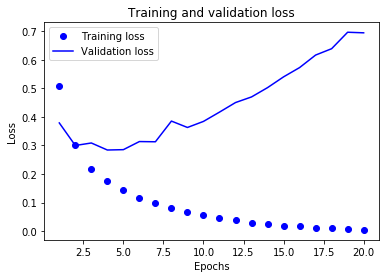

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

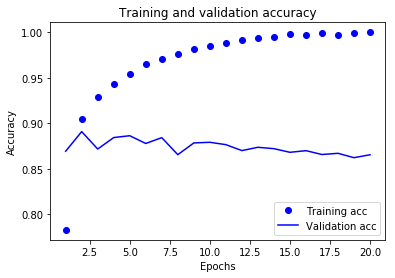

In [41]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


<h2> 그래프 결과
 <h3> 점선 : 훈련손실 , 훈련정확도 -> training
  <h3> 실선 : 검증손실, 검증 정확도 -> testing
   <h3> 훈련손실과 훈련 정확도는 epochs가 진행될수록 좋아지지만, 검증 손실과 검증 정확도는 아닙니다.
       <h3> 훈련세트와 처음보는 데이터의 차이이다. 정확한 용어로 과대적합이라고 한다.
           <h3> 두번째 epochs이후에 그래프가 역전 되는 것을 볼 수 있다. 
               <h3>따라서 세번째 에포크 이후에 훈련을 중지하면 과대적합을 완화할 수 있다.
           

In [45]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 177us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 4s 143us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.1985 - acc: 0.9293
Epoch 4/4
25000/25000 [==============================] - 11s 443us/step


<h2>모델을 처음부터 다시 훈련하기

In [46]:
results

[0.32428880637168883, 0.873]

87.3%의 정확성을 보여주고 있다.

In [47]:
model.predict(x_test)

array([[0.1354138 ],
       [0.99971277],
       [0.2771262 ],
       ...,
       [0.0707227 ],
       [0.04242176],
       [0.4752401 ]], dtype=float32)

<h2>훈련된 데이터의 예측값
    <h3> 훈련된 데이터의 예측 정도 min : 4% max : 99%